<table>
    <tr>
        <td class="bTop" colspan="3">
        <img src="logo_UL_FME.png" height="200" width="200">
        </td>
        <td>       
        <img src="LFDT_logo.jpg" height="200" width="200">
        </td>
    </tr>                                           
</table>

<h1> Implementacija eksplicitne metode na 1D difuzijskem problemu / <font color='gray'>Implementation of explicit method on 1D diffusion problem</font></h1>

Avtor: / <font color='gray'> Author: </font> Mihael Boštjan Končar

Povzeto po primeru: / <font color='gray'> Adapted from the case: </font>
H.K. Versteeg, M.L. Malalasekera, An Introduction to Computational Fluid Dynamics, The Finite Volume Method, Second Edition, Prentice Hall, Harlow, 2007 (245-256).

<h2>Definicija naloge / <font color='gray'>Problem definition</font></h2>
Tanka plošča ima na začetku temperaturo $200 °C$ po celotnem volumnu. V določenem trenutku $t = 0$ temperatura vzhodnega robu plošče pade na $0 °C$. Vse ostale površine plošče so izolirane.
Z uporabo eksplicitne metode s primernim časovnim korakom izračunaj časovni potek temperaturne razporeditve po plošči in jo primerjaj z analitično rešitvijo pri časih:
$t_1 = 40 s, t_2 = 80 s, t_3 = 120 s$

Preračunaj numerično rešitev, če uporabimo kritični časovni korak: $\Delta t = \rho c \frac{(\Delta x)^2}{2k} (=8s)$ za čas $t = 40 s$ in primerjaj rezultat z analitično rešitvijo.

Podatki:
<ul>
    <li>Debelina plošče: $L = 2 cm$</li>
    <li>Toplotna prevodnost plošče: $k = 10 \frac{W}{mK}$</li>
    <li>Volumsko specifična termična masa $\rho c = 10 \cdot 10^6 \frac{J}{m^3K}$</li>
</ul>

Prikaži še numerično rešitev za vse 3 vrste robnih pogojev (Dirichlet, Neumann, Robin) na vzhodnem oziroma zahodnem robu plošče. Pri tem upoštevaj konstantno temperaturo okoliške tekočine $T_\infty = 20 °C$ in koeficient toplotne prestopnosti $h=15 \frac{W}{m^2K}$.


<p><font color='gray'>
  
A thin plate is initially at a uniform temperature of $200 °C$. At a certain time $t = 0$ the temperature of the east side of the plate is suddenly reduced to $0 °C$. The other surface is insulated.
Use the explicit finite volume method in conjunction with a suitable time step size to calculate the transient temperature
distribution of the slab and compare it with the analytical solution at time:
$t_1 = 40 s, t_2 = 80 s, t_3 = 120 s$

Recalculate the numerical solution using a time step size equal to the limit $\Delta t = \rho c \frac{(\Delta x)^2}{2k} (=8s)$ for $t = 40 s$ and compare the results with the analytical solution.
The data:
<ul>
    <li>Plate thickness: $L = 2 cm$</li>
    <li>Thermal conductivity: $k = 10 \frac{W}{mK}$</li>
    <li>Volume specific thermal mass $\rho c = 10 \cdot 10^6 \frac{J}{m^3K}$</li>
</ul>
    
Show numerical solution for all 3 types of boundary conditions (Dirichlet, Neumann, Robin) on east or west boundary. Assume constant temperature of surrounding fluid $T_\infty = 20 °C$ and coefficient of heat transfer $h=15 \frac{W}{m^2K}$.
</p>
</font>

<h2>Osnove /  <font color='gray'> Basis </font></h2>
Vodilna enačba (1D prevod toplote v časovno neustaljenih pogojih): / <font color='gray'> Govering equation (unsteady 1D  heat conduction): </font>

$\rho c \frac{\partial T}{\partial t}=\frac{\partial}{\partial x}(k \frac{\partial T}{\partial x})+S$

Eksplicitna diskretizaicija: / <font color='gray'> Explicit discretisation: </font>

$a_P T_P = a_w T^0_W + a_E  T^0_E + [a_P^0-(a_W+a_E-S_p)]T_P^0+S_u$

Kjer je: / <font color='gray'> Where is: </font>

$a_P = a^0_P$

$a_P^0=\rho c \frac{\Delta x}{\Delta t}$

$a_W = \frac{k_w}{\delta x_{WP}}$

$a_E = \frac{k_e}{\delta x_{PE}}$

<h2> Robni pogoji: / <font color='gray'> Boundary conditions: </font> </h2>

    
   Dirichletov robni pogoj: / <font color='gray'> Dirichlet boundary condition: </font>
   <table style="width:100%">
  <tr>
    <th>Stran / <font color='gray'> Side: </font></th>
    <th>$a_P$</th>
    <th>$a_P^0$</th> 
    <th>$a_W$</th>
    <th>$a_E$</th>
    <th>$S_u$</th>  
  </tr>
  <tr>
    <td>Zahod / <font color='gray'> West: </font></td>
    <td>$a^0_P$</td>
    <td>$\rho c \frac{\Delta x}{\Delta t}$</td>
    <td>$0$</td>
    <td>$\frac{k_e}{\delta x_{PE}}$</td>
    <td>$\frac{2k_w}{\delta x_{WP}} (T_B-T^0_P)$</td>
  </tr>
  <tr>
    <td>Vzhod / <font color='gray'> East: </font>
    <td>$a^0_P$</td>
    <td>$\rho c \frac{\Delta x}{\Delta t}$</td>
    <td>$\frac{k_w}{\delta x_{WP}}$</td>
    <td>$0$</td>
    <td>$\frac{2k_e}{\delta x_{PE}} (T_B-T^0_P)$</td>
  </tr>
</table>   
   
   Neumannov robni pogoj: / <font color='gray'> Neumann condition: </font>
   <table style="width:100%">
  <tr>
    <th>Stran / <font color='gray'> Side: </font></th>
    <th>$a_P$</th>
    <th>$a_P^0$</th> 
    <th>$a_W$</th>
    <th>$a_E$</th>
    <th>$S_u$</th>  
  </tr>
  <tr>
    <td>Zahod / <font color='gray'> West: </font></td>
    <td>$a^0_P$</td>
    <td>$\rho c \frac{\Delta x}{\Delta t}$</td>
    <td>$0$</td>
    <td>$\frac{k_e}{\delta x_{PE}}$</td>
    <td>$q_w$</td>
  </tr>
  <tr>
    <td>Vzhod / <font color='gray'> East: </font>
    <td>$a^0_P$</td>
    <td>$\rho c \frac{\Delta x}{\Delta t}$</td>
    <td>$\frac{k_w}{\delta x_{WP}}$</td>
    <td>$0$</td>
    <td>$q_e$</td>
  </tr>
</table>
      
   Robinov robni pogoj: / <font color='gray'> Robin boundary condition: </font>
   <table style="width:100%">
  <tr>
    <th>Stran / <font color='gray'> Side: </font></th>
    <th>$a_P$</th>
    <th>$a_P^0$</th> 
    <th>$a_W$</th>
    <th>$a_E$</th>
    <th>$S_p$</th>
    <th>$S_u$</th>
      
  </tr>
  <tr>
    <td>Zahod / <font color='gray'> West: </font></td>
    <td>$a^0_P$</td>
    <td>$\rho c \frac{\Delta x}{\Delta t}$</td>
    <td>$0$</td>
    <td>$\frac{k_e}{\delta x_{PE}}$</td>
    <th>$-\frac{h}{k_w}$</th>
    <td>$\frac{h}{k_w} T_\infty$</td>
  </tr>
  <tr>
    <td>Vzhod / <font color='gray'> East: </font>
    <td>$a^0_P$</td>
    <td>$\rho c \frac{\Delta x}{\Delta t}$</td>
    <td>$\frac{k_w}{\delta x_{WP}}$</td>
    <td>$0$</td>
    <th>$-\frac{h}{k_e}$</th>
    <td>$\frac{h}{k_e} T_\infty$</td>
  </tr>
</table>
  

<h2>Implementacija metode v kodi /<font color='gray'> Implemetation of method in code: </font> </h2>

In [1]:
#za lažje delo z matrikami uvozimo knjižnjico numpy / for esier work with matrices library numpy is imported
import numpy as np

In [2]:
def explicit_diffusion1D(n, t, dt='Auto', L = 0.02, k = 10, Tinit = 200, boundaryW = 'Dirichlet', boundaryE = 'Dirichlet',  \
                         TBW = 0, TBE = 0, roc = 10*10**6, h = 15, Tinf = 20, q = 0):
    """Funkcija omogoča reševanje 1D difuzije toplote v časovno neustaljenem stanju, brez izvornega člena, z eksplicitno metodo.
    
    Dovoljeni robni pogoji (vrstni red ni pomemben): / Allowed boundary conditions (order is not important):
    Dirichlet-Dirichlet, Dirichlet-Neumann, Dirichlet-Robin, Robin-Neumann
    
    Vhodni podatki / input data:
    št. delitev / number of division -> n [/]
    čas simulacije / total time of simulation -> t [s]
    časovni korak / time step -> dt [s], privzeta vrednost / default value dt = rho * cp * dx^2/2k
    Dolžina domene / domain legth -> L[m]
    Toplotna prevodnost / thermal conductivity -> k [W/m.K]
    Začetna temperatura / initial temperature -> Tinit [°C]
    Tipa robnih pogojev / types of boundary condition boundaryW in/and boundaryE
    Temperatura zahodnega robu (RP) / West boundary temp. (BC) -> TBW [°C]
    Temperatura vzhodnega robu (RP) / East boundary temp. (BC) -> TBE [°C]
    Volumsko specifična termičnaa masa / Volume specific thermal mas -> roc [J/m^3.K]
    Toplotna prestopnost (RP) / coefficient of heat transfer (BC) -> h [W/m^2.K]
    Temperatura okoliške tekočine (RP) / Sorrounding fluid temp. (BC) -> Tinf [°C]
    Toplotni tok na robu (RP) / Heat flux (boundary cindition) (BC) -> q[W/m^2]
    
    Rezultat funkcije je numpy numerično polje (vrstica - dt, stolpec - dx). /
    Result of function is numpy array (row - dt, column -dx).
    
    """
    
     #velikost prostorske diskretizacije (dx) / spatial discretisation size (dx)
    dx = L / n
    
    #inicializacija / initialisation
    Temperatures = np.asarray([]) #inicializacija matrike rezultatov (temp. v časovnem koraku) / init. of results matrix (temp. in time step)
    Temp_int = Tinit * np.ones((1,n)) #vrstični vektor začetnih temperatur (t=0)/ initital temperature row vector (t=0)
    Temperatures = Temp_int #dodajanje Tinit v matriko rez. / adding Tinit to results matrix
    tc = 0. #inic. časa simulacije / init. of time of simulation   
    
    #določanje privzetega časovnega koraka (največji dovoljen) / init. of default time step (max allowed)
    if dt == 'Auto':
        dt = roc * x**2/(2*k)
    
    #zanka za "časovno korakanje" naprej do max. časa sim. t / loop for forward "time marching" up to max. simulation time t
    while tc < t:
        tc += dt #izračun pretečenega časa v trenutnem časovnem koraku / calculation of elapsed time in current time step
        
        #inicializacija vektorja novih in starih temp. / init. of vector of new and old temp.
        Temp_vector_new = np.zeros(n)
        Temp_vector_old = Temperatures[-1,:]
        #inicializacija temp. v sosednjih točkah / init. of temp. in neighbouring nodes
        TW0 = 0.
        TP0 = 0.
        TE0 = 0.
        
        
        #vpeljava robnih pogojev zahodno / introduction of west boundary conditions
        
        if boundaryW == 'Dirichlet':
            #definicija starih temp. sosednjih točk / definition of old temp. in neighbouring nodes
            TP0 = Temp_vector_old[0]
            TE0 = Temp_vector_old[1]
            #vrednosti koeficientov za zahodno točko / values of coefficients for west node
            aP0 = roc * dx/dt
            aP = aP0
            aW = 0
            aE = k/dx
            SP = 0.
            Su = 2*k/dx * (TBW - TP0)
            #Računanje temperature v novem dt (zahodni rob) / Calculating temperatures in new dt (west boundary)
            Temp_vector_new[0] = ( aW*TW0 + aE*TE0 + (aP0 - (aW + aE -SP)) * TP0 + Su ) / aP
        
        if boundaryW == 'Neumann':
            #definicija starih temp. sosednjih točk / definition of old temp. in neighbouring nodes
            TP0 = Temp_vector_old[0]
            TE0 = Temp_vector_old[1]
            #vrednosti koeficientov za zahodno točko / values of coefficients for west node
            aP0 = roc * dx/dt
            aP = aP0
            aW = 0
            aE = k/dx
            SP = 0.
            Su = q
            #Računanje temperature v novem dt (zahodni rob) / Calculating temperatures in new dt (west boundary)
            Temp_vector_new[0] = ( aW*TW0 + aE*TE0 + (aP0 - (aW + aE -SP)) * TP0 + Su ) / aP
            
        if boundaryW == 'Robin':
            #definicija starih temp. sosednjih točk / definition of old temp. in neighbouring nodes
            TP0 = Temp_vector_old[0]
            TE0 = Temp_vector_old[1]
            #vrednosti koeficientov za zahodno točko / values of coefficients for west node
            aP0 = roc * dx/dt
            aP = aP0
            aW = 0
            aE = k/dx
            SP = -h/k
            Su = h/k * Tinf
            #Računanje temperature v novem dt (zahodni rob) / Calculating temperatures in new dt (west boundary)
            Temp_vector_new[0] = ( aW*TW0 + aE*TE0 + (aP0 - (aW + aE -SP)) * TP0 + Su ) / aP      
                     
        #vpeljava robnih pogojev vzhodno / introduction of east boundary conditions
        
        if boundaryE == 'Dirichlet':
            #definicija starih temp. sosednjih točk / definition of old temp. in neighbouring nodes
            TP0 = Temp_vector_old[-1]
            TW0 = Temp_vector_old[-2]
            #vrednosti koeficientov za vzhodno točko / values of coefficients for east node
            aP0 = roc * dx/dt
            aP = aP0
            aW = k/dx
            aE = 0
            SP = 0.
            Su = 2*k/dx * (TBE - TP0)
            #Računanje temperature v novem dt (vzhodni rob) / Calculating temperatures in new dt (west boundary)
            Temp_vector_new[-1] = ( aW*TW0 + aE*TE0 + (aP0 - (aW + aE -SP)) * TP0 + Su ) / aP
        
        if boundaryE == 'Neumann':
            #definicija starih temp. sosednjih točk / definition of old temp. in neighbouring nodes
            TP0 = Temp_vector_old[-1]
            TW0 = Temp_vector_old[-2]
            #vrednosti koeficientov za vzhodno točko / values of coefficients for east node
            aP0 = roc * dx/dt
            aP = aP0
            aW = k/dx
            aE = 0
            SP = 0.
            Su = q
            #Računanje temperature v novem dt (zahodni rob) / Calculating temperatures in new dt (west boundary)
            Temp_vector_new[-1] = ( aW*TW0 + aE*TE0 + (aP0 - (aW + aE -SP)) * TP0 + Su ) / aP
            
        if boundaryE == 'Robin':
            #definicija starih temp. sosednjih točk / definition of old temp. in neighbouring nodes
            TP0 = Temp_vector_old[-1]
            TW0 = Temp_vector_old[-2]
            #vrednosti koeficientov za vzhodno točko / values of coefficients for east node
            aP0 = roc * dx/dt
            aP = aP0
            aW = k/dx
            aE = 0
            SP = -h/k
            Su = h/k * Tinf
            #Računanje temperature v novem dt (vzhodni rob) / Calculating temperatures in new dt (east boundary)
            Temp_vector_new[-1] = ( aW*TW0 + aE*TE0 + (aP0 - (aW + aE -SP)) * TP0 + Su ) / aP        
              
        #izračun temp. v notranjih točkah / calculation of temp. in inner nodes
        for i in range(1,n-1):
            #definicija starih temp. sosednjih točk / definition of old temp. in neighbouring nodes
            TW0 = Temp_vector_old[i-1]
            TP0 = Temp_vector_old[i]
            TE0 = Temp_vector_old[i+1]
            #vrednosti koeficientov za notranje točke / values of coefficients for inner nodes
            aP0 = roc * dx/dt
            aP = aP0
            aW = k/dx
            aE = k/dx
            SP = 0.
            #Računanje temperature v novem dt / Calculating temperatures in new dt
            Temp_vector_new[i] = ( aW*TW0 + aE*TE0 + (aP0 - (aW + aE -SP)) * TP0) / aP
        
        #zapis rezultatov v matriko rezultatov / writing results in results matrix
        Temperatures = np.vstack((Temperatures, Temp_vector_new))      
    print('Calculation completed.')    
    return Temperatures

<h2>Uporaba funkcije /<font color='gray'> Use of function </font></h2>
<h3>Vnos snovnih lastnosti /<font color='gray'> Definition of material properties </font></h3>

In [3]:
L = 0.02 #[m]
k = 10 #[W/m.K]
roc = 10*10**6 #[J/m^3.K]
h = 15 #[W/m^2.K]
q = 0 #[W/m^2]

<h3>Definicija vhodnih parametrov, robnih pogojev, izračun in prikaz rezultata /

<font color='gray'> Definition of input parameters, boundary conditions, calculation and display of results. </font>
</h3>

In [4]:
#uvoz potrebnih knjižnic / import of needed libraries
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider
%matplotlib notebook

IntSlider(value=5, description='Num. of div. [/]', min=3)

Button(description='Confirm', icon='check', style=ButtonStyle(), tooltip='Description')

IntSlider(value=20, description='Max time [s]', max=300, min=5)

FloatSlider(value=2.0, description='Time step [s]', max=8.0, min=0.01, step=0.01)

Dropdown(description='West BC', index=1, options=('Dirichlet', 'Neumann', 'Robin'), value='Neumann')

Dropdown(description='East BC', options=('Dirichlet', 'Neumann', 'Robin'), value='Dirichlet')

IntSlider(value=200, description='Temp. init [°C]', max=300, min=-100, step=10)

Button(description='Confirm', icon='check', style=ButtonStyle(), tooltip='Description')

IntSlider(value=0, description='Temp. east', max=300, min=-100, step=10)

IntSlider(value=0, description='q [W/m^2]', max=300, step=10)

Button(description='Run calculation', icon='check', style=ButtonStyle(), tooltip='Description')

Calculation started
Calculation completed.


<IPython.core.display.Javascript object>


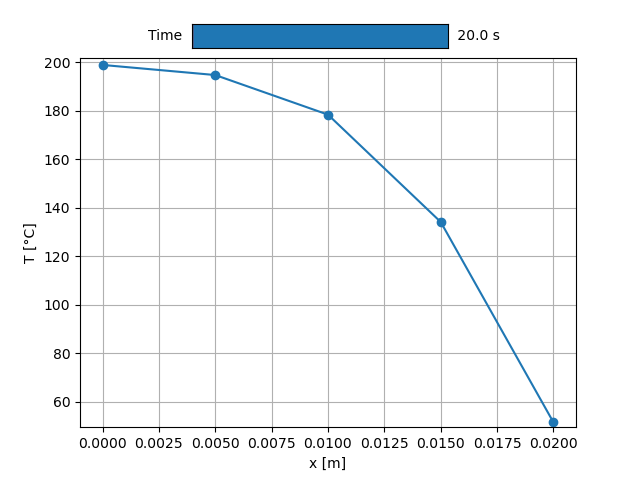

In [5]:
#inicializacija vhodnih podatkov izračuna / initialisation of calculation input parameters
n_slider=t_slider=dt_slider=w_bound=e_bound=T_init=TBW_slider=TBE_slider=q_slider=TB_inf=h_slider=0

#inicializacija widget-a za interaktivno izbiro št. delitev / initialisation for interactive num. of division selection
n_slider = widgets.IntSlider(min=3, max = 100, step=1, value=5, description='Num. of div. [/]')

#inicializacija gumbov / init. of buttons
button1 = widgets.Button(
        description='Confirm',
        disabled = False,
        button_style='', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Description',
        icon='check')
    
button2 = widgets.Button(
            description='Confirm',
            disabled=False,
            button_style='', # 'success', 'info', 'warning', 'danger' or ''
            tooltip='Description',
            icon='check')
    
button3 = widgets.Button(
            description='Run calculation',
            disabled=False,
            button_style='', # 'success', 'info', 'warning', 'danger' or ''
            tooltip='Description',
            icon='check')

display(n_slider, button1)


def on_button_clicked(button):
    '''Aktivnost ob kliku na gumb / activity when button is clicked'''
    #klicanje globalnih spremenljivk / calling global variables
    global n_slider, t_slider, dt_slider, w_bound, e_bound, T_init, TBW_slider, TBE_slider, q_slider, TB_inf, h_slider

    #definicija akcij za posamezen gumb / definition of actions for individual button        
    if button == button1:
        t_slider =  widgets.IntSlider(min=5, max = 300, step=1, value=20, description='Max time [s]')
        dt_slider = widgets.FloatSlider(min=0.01, max = roc * ((L/(n_slider.value))**2)/(2*k), step=0.01, value=2,
                                    description='Time step [s]')
        w_bound = widgets.Dropdown(options=['Dirichlet','Neumann', 'Robin'], 
                               value='Neumann', 
                               description='West BC')
        e_bound = widgets.Dropdown(options=['Dirichlet','Neumann', 'Robin'], 
                               value='Dirichlet', 
                               description='East BC')
        T_init = widgets.IntSlider(min=-100, max=300, step=10, value=200,description='Temp. init [°C]')
        display(t_slider, dt_slider, w_bound, e_bound,T_init, button2)
        return    
    if button == button2:
        #branje novih vrednosti parametrov / reading new values
        TBW_slider = widgets.IntSlider(min=-100, max=300, step=10, value=0,description='Temp. west')
        TBE_slider = widgets.IntSlider(min=-100, max=300, step=10, value=0,description='Temp. east')
        q_slider = widgets.IntSlider(min=0, max=300, step=10, value=0, description='q [W/m^2]')
        TB_inf = widgets.IntSlider(min=-100, max=300, step=10, value=20,description='Temp. fluid surr.')
        h_slider = widgets.IntSlider(min=1, max=100, step=1, value = 15,description='h coeff.')
        
        if w_bound.value == 'Dirichlet':
            display(TBW_slider)    
        if e_bound.value == 'Dirichlet':
            display(TBE_slider)
        if e_bound.value == 'Neumann' or w_bound.value == 'Neumann':
            display(q_slider)
        if e_bound.value == 'Robin' or w_bound.value == 'Robin':
            display(TB_inf,h_slider)             
        display(button3)
        return
    
    if button == button3:
        #zagon izračun / calculation run
        print("Calculation started")
        Temperatures = explicit_diffusion1D(\
                     n=n_slider.value,\
                     t = t_slider.value,\
                     dt = dt_slider.value,\
                     L = L,\
                     k = k,\
                     Tinit = T_init.value,\
                     boundaryW = w_bound.value,\
                     boundaryE = e_bound.value, \
                     TBW = TBW_slider.value,\
                     TBE = TBE_slider.value,\
                     roc = roc,\
                     h = h_slider.value,\
                     Tinf = TB_inf.value,\
                     q = q_slider.value)
        
        #izris rezultatov izračuna / plotting the results
        %matplotlib notebook
        
        fig, ax = plt.subplots()
        ax.set_xlabel('x [m]')
        ax.set_ylabel('T [°C]')
        plt.ylim(min(Temperatures.flatten())-2,max(Temperatures.flatten())+2)
        plt.grid(b=True,which='both')

        #CReate slider axes
        ax_time = fig.add_axes([0.3, 0.9, 0.4, 0.05])
        ax_time.spines['top'].set_visible(True)
        ax_time.spines['right'].set_visible(True)

        # Create sliders
        time = Slider(ax=ax_time, label='Time ', valmin = 0, valmax=dt_slider.value*t_slider.value//dt_slider.value,
              valfmt=' %1.1f s',valstep=dt_slider.value)

        # Plot default data
        x = np.linspace(0, L, n_slider.value)
        default_y = Temperatures[0,:]
        line, = ax.plot(x,default_y,'o-')

        # Update values
        def update(val):
            i = time.val//dt_slider.value
            line.set_data(x,Temperatures[int(i),:])
            fig.canvas.draw_idle()
        time.on_changed(update)

#klicanje funkcije aktivnosti / calling function "when clicked"
button1.on_click(on_button_clicked)
button2.on_click(on_button_clicked)
button3.on_click(on_button_clicked)

<h2> Primerjava numerične rešitve z analitično / <font color='gray'> Comparison with analytical solution </font></h2>

<h3> Izračun temperaturnega polja za primerjavo / <font color='gray'> Calcultaion of temperature profile fro comparison </font></h3>

Vnos števila delitev, časa simulacije in velikosti časovnega koraka / <font color='gray'> Input - number of division, simulation time and time step size</font>

In [7]:
n_A = eval(input('Število delitev: / Num. of division: '))
t_A = eval(input('Čas simulacije [s]: /Simulation time: '))
dt_A = eval(input(f'Velikost časovnega koraka [s]: / Time step size [s] (max(dt) = {roc*(L/float(n_A))**2/(2*k) } s): '))

Število delitev: / Num. of division: 5
Čas simulacije [s]: /Simulation time: 20
Velikost časovnega koraka [s]: / Time step size [s] (max(dt) = 8.0 s): 1


Ker analitična reštev velja za primer opisan v definiciji naloge v izračunu privzamemo naslednje vrednosti: / 

<font color='gray'> Analytical solution is only valid for case described in definition, therefore we apply next values:</font>

In [10]:
Temperatures_A = explicit_diffusion1D(\
                     n=n_A,\
                     t=t_A,\
                     dt=dt_A,\
                     L = L,\
                     k = k,\
                     Tinit = 200,\
                     boundaryW = 'Neumann',\
                     boundaryE = 'Dirichlet', \
                     TBW = 0,\
                     TBE = 0,\
                     roc = roc,\
                     h = 0,\
                     Tinf = 0,\
                     q = 0)

Calculation completed.


<h3> Zapis analitične enačbe v kodi. / <font color='gray'> Implementation of analytical equation in code. </font></h3>

$\frac{4}{\pi}\sum_{n=1}^{\infty}\frac{(-1)^{n+1}}{2n -1}exp(-\alpha \lambda_n^2t)cos(\lambda_n x)$,
kjer je / <font color='gray'> where is </font>
$\lambda_n=\frac{(2n-1)\pi}{2L}$ in / <font color='gray'> and </font> $\alpha=\frac{k}{\rho c}$

Opomba: upoštevamo prvih 100 členov zaporedja. <font color='gray'> Note: first 100 terms of sequence are incorporated,</font>

In [8]:
def analytical(i,x,L=L,dt=dt_slider.value):
    t = dt*i 
    exp = 0
    a = k / roc
    for e in range(1,100):
        lam = (2*e-1)*np.pi/2/L
        exp += ((-1)**(e+1))/(2*e-1) * np.exp(-a*lam**2 * t) * np.cos(lam*x)
    return 4*200/np.pi * exp

<h4> Izris rešitve / <font color='gray'> Plotting the sollution. </font></h4>
Opomba: Analitična rešitev pri času $t=0$ ni dobro definirana. / <font color='gray'> Note: Analytical solution at time $t=0$ is not well defined.</font>

<IPython.core.display.Javascript object>


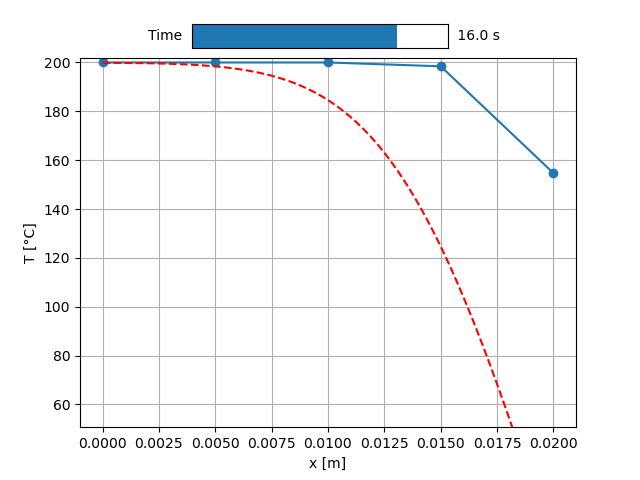

0

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('x [m]')
ax.set_ylabel('T [°C]')
plt.ylim(min(Temperatures_A.flatten())-2,max(Temperatures_A.flatten())+2)
plt.grid(b=True,which='both')
#Create slider axes
ax_time = fig.add_axes([0.3, 0.9, 0.4, 0.05])
ax_time.spines['top'].set_visible(True)
ax_time.spines['right'].set_visible(True)

# Create sliders
time = Slider(ax=ax_time, label='Time ', valmin = 0, valmax=dt_slider.value*t_slider.value//dt_slider.value,
              valfmt=' %1.1f s',valstep=dt_slider.value)

#Plot default data
x = np.linspace(0, L, n_slider.value)
default_y = Temperatures_A[0,:]
line, = ax.plot(x,default_y,'o-')
line1, = ax.plot(x,default_y,'r--')

#Update function
def fun1(i):
    x = np.linspace(0,L,100)
    Temp_vector = analytical(i,x)
    return x, Temp_vector

# Update values
def update(val):
    i = time.val//dt_slider.value
    line.set_data(x,Temperatures_A[int(i),:])
    analytical_data = fun1(i)
    line1.set_data(analytical_data[0],analytical_data[1])
    fig.canvas.draw_idle()
time.on_changed(update)

In [ ]:
#Izpis tabele za verifikacijo izračuna s knjigo
print(explicit_diffusion1D(n=5,\
                     t=20,\
                     dt=2,\
                     L = L,\
                     k = k,\
                     Tinit = 200,\
                     boundaryW = 'Neumann',\
                     boundaryE = 'Dirichlet', \
                     TBW = 0,\
                     TBE = 0,\
                     roc = roc,\
                     h = 0,\
                     Tinf = 0,\
                     q = 0))